In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
% matplotlib inline

## Business objective

Airline travel insurance become more important as it contribute to additional business profit

Based on customer search behaviour, we will predict whether a customer will buy ancillary (additional product/services). As of now, you have to develop the model for insurance purchase prediction 

## read data

In [38]:
df = pd.read_csv('AncillaryScoring_insurance.csv', encoding ='iso-8859-1')

In [20]:
df.head()

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,0,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52


In [5]:
df.columns

Index(['PAXCOUNT', 'SALESCHANNEL', 'TRIPTYPEDESC', 'PURCHASELEAD',
       'LENGTHOFSTAY', 'flight_hour', 'flight_day', 'ROUTE',
       'geoNetwork_country', 'BAGGAGE_CATEGORY', 'SEAT_CATEGORY',
       'FNB_CATEGORY', 'INS_FLAG', 'flightDuration_hour'],
      dtype='object')

In [10]:
df.dtypes

PAXCOUNT                 int64
SALESCHANNEL            object
TRIPTYPEDESC            object
PURCHASELEAD             int64
LENGTHOFSTAY             int64
flight_hour              int64
flight_day              object
ROUTE                   object
geoNetwork_country      object
BAGGAGE_CATEGORY         int64
SEAT_CATEGORY            int64
FNB_CATEGORY             int64
INS_FLAG                 int64
flightDuration_hour    float64
dtype: object

## data pre-processing

In [6]:
## detect null & missing value
df.isnull().sum()

PAXCOUNT               0
SALESCHANNEL           0
TRIPTYPEDESC           0
PURCHASELEAD           0
LENGTHOFSTAY           0
flight_hour            0
flight_day             0
ROUTE                  0
geoNetwork_country     0
BAGGAGE_CATEGORY       0
SEAT_CATEGORY          0
FNB_CATEGORY           0
INS_FLAG               0
flightDuration_hour    0
dtype: int64

No missing value in the dataset

## Exploratory data analysis

In [8]:
## summary stats 
df.describe()

,PAXCOUNT,PURCHASELEAD,LENGTHOFSTAY,flight_hour,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,0.149560,7.277561
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,0.356643,1.496863
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,4.670000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,0.000000,5.620000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,0.000000,7.570000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,0.000000,8.830000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,1.000000,9.500000


                     PAXCOUNT  PURCHASELEAD  LENGTHOFSTAY  flight_hour  \
PAXCOUNT             1.000000      0.212606     -0.115850     0.015607   
PURCHASELEAD         0.212606      1.000000     -0.076560     0.035973   
LENGTHOFSTAY        -0.115850     -0.076560      1.000000    -0.024872   
flight_hour          0.015607      0.035973     -0.024872     1.000000   
BAGGAGE_CATEGORY     0.120404     -0.022207      0.176757    -0.011434   
SEAT_CATEGORY        0.028544     -0.004499      0.032264     0.012171   
FNB_CATEGORY         0.022943     -0.022653      0.098828     0.013014   
INS_FLAG             0.024116     -0.022131     -0.042408     0.007127   
flightDuration_hour -0.063169      0.067866      0.141181    -0.002101   

                     BAGGAGE_CATEGORY  SEAT_CATEGORY  FNB_CATEGORY  INS_FLAG  \
PAXCOUNT                     0.120404       0.028544      0.022943  0.024116   
PURCHASELEAD                -0.022207      -0.004499     -0.022653 -0.022131   
LENGTHOFSTAY       

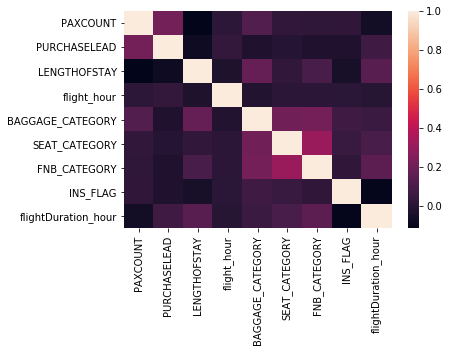

In [34]:
## correlation 


# calculate the correlation matrix
corr = df.corr()

print(corr)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



- Most of the variables show low correlation with each other
- INS_FLAG doesn't show any high correlation with other variable


### Data visualization & histogram plot

['PAXCOUNT', 'PURCHASELEAD', 'LENGTHOFSTAY', 'flight_hour', 'BAGGAGE_CATEGORY', 'SEAT_CATEGORY', 'FNB_CATEGORY', 'INS_FLAG', 'flightDuration_hour']


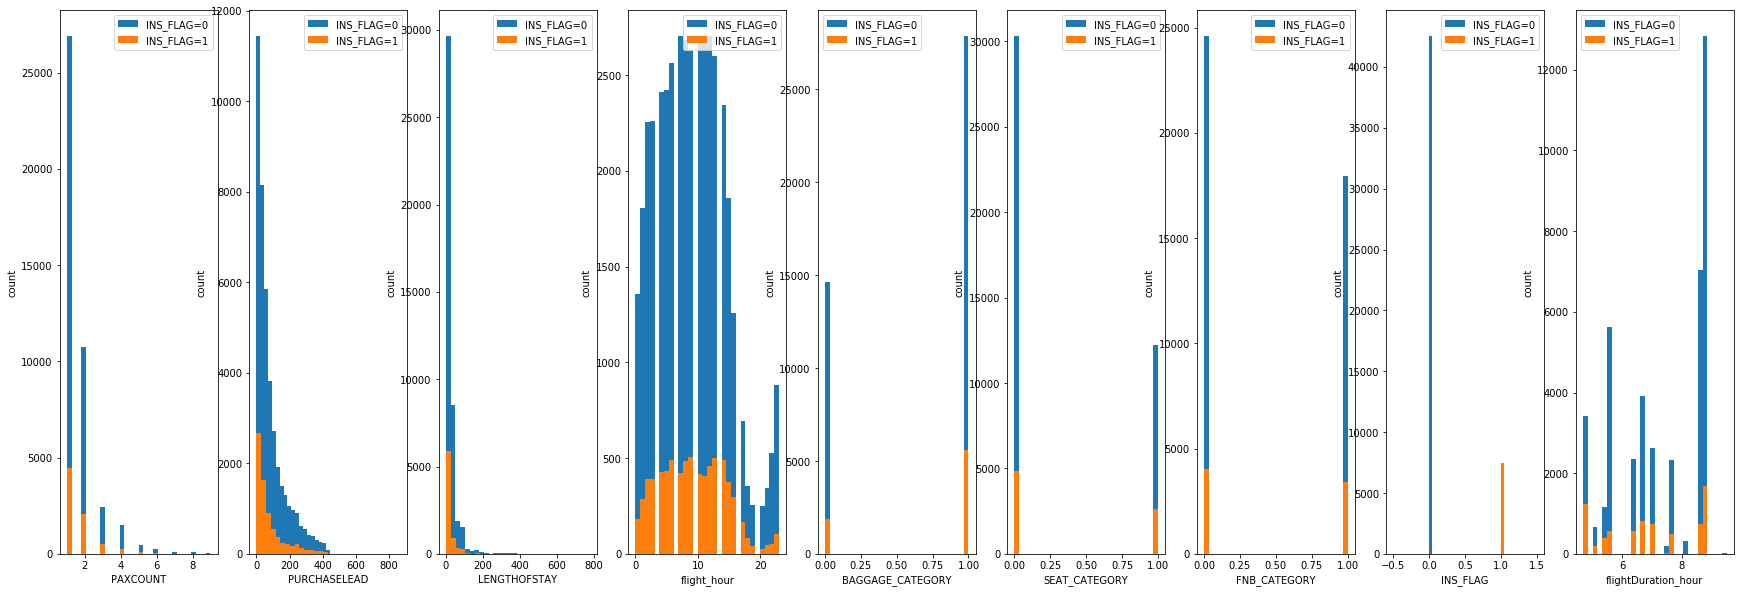

In [46]:
## select columns that is numeric and continuous 
continues_var=[i for i in df.columns if df[i].dtypes !='object']

print(continues_var)

fig , ax = plt.subplots(1,9,figsize=(30,10))

for i , x in enumerate(continues_var):
    ax[i].hist( df[x][df.INS_FLAG== 0 ],label='INS_FLAG=0',bins=30)
    ax[i].hist( df[x][df.INS_FLAG== 1],label='INS_FLAG=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

Based on the distribution above "INS_FLAG vs Variables_X" , we can see that there are no clear difference in distribution between those had purchased insurance & those doesn't 

## train test data 

In [47]:

# prepare data for model training

## select numeric columns only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = df.select_dtypes(include=numerics)


X = df.drop(columns=['INS_FLAG'])
# X = X[['BAGGAGE_CATEGORY','SEAT_CATEGORY','FNB_CATEGORY']]



y = df['INS_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model 1 (baseline) - XGBoost Classifier (using selected numeric variable only)

In [48]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score


# xgr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)

xgr = XGBClassifier( n_estimators= 1000, max_depth=5)


## fit the model to train data set
xgr.fit(X_train, y_train , eval_metric= 'auc', verbose = 200)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
predictions = xgr.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
## overall model accucary
from sklearn import metrics

predictions = xgr.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8482666666666666
Precision: 0.3672566371681416
Recall: 0.037454873646209384


In [51]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, predictions) )  
print(classification_report(y_test, predictions) ) 

[[12641   143]
 [ 2133    83]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12784
           1       0.37      0.04      0.07      2216

   micro avg       0.85      0.85      0.85     15000
   macro avg       0.61      0.51      0.49     15000
weighted avg       0.78      0.85      0.79     15000



- Based on Xgboost Logit Classifer result above, we able to get average 85% accuracy
- however this is not a robust classifier, as it failed to detect & classify class-1 (those who bought insurance) accurately , f1-score =0.07 only
- this may caused by imbalance class input data
- feature engineering & parameter tuning needed for improvement


In [32]:
## dataframe for actual value vs prediction value
result_df = pd.DataFrame({'actual': y_test, 'prediction': predictions } )
result_df.head(10)

,actual,prediction
33553,0,0
9427,0,0
199,0,0
12447,0,0
39489,0,0
42724,1,0
10822,0,0
49498,0,0
4144,0,0
36958,0,0


### evaluate XGboost evaluation error

In [77]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xgr.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.646969	validation_0-error:0.150343	validation_1-auc:0.648421	validation_1-error:0.147733
[1]	validation_0-auc:0.647581	validation_0-error:0.150343	validation_1-auc:0.648838	validation_1-error:0.147733
[2]	validation_0-auc:0.647576	validation_0-error:0.150343	validation_1-auc:0.648858	validation_1-error:0.147733
[3]	validation_0-auc:0.651169	validation_0-error:0.150343	validation_1-auc:0.652754	validation_1-error:0.147733
[4]	validation_0-auc:0.651207	validation_0-error:0.150343	validation_1-auc:0.652683	validation_1-error:0.147733
[5]	validation_0-auc:0.656363	validation_0-error:0.150343	validation_1-auc:0.656573	validation_1-error:0.147733
[6]	validation_0-auc:0.656887	validation_0-error:0.150343	validation_1-auc:0.65748	validation_1-error:0.147733
[7]	validation_0-auc:0.657079	validation_0-error:0.150343	validation_1-auc:0.658143	validation_1-error:0.147733
[8]	validation_0-auc:0.657174	validation_0-error:0.150343	validation_1-auc:0.65878	validation_1-error:0.1

[73]	validation_0-auc:0.69418	validation_0-error:0.150343	validation_1-auc:0.682237	validation_1-error:0.147733
[74]	validation_0-auc:0.694402	validation_0-error:0.150343	validation_1-auc:0.68232	validation_1-error:0.1478
[75]	validation_0-auc:0.694653	validation_0-error:0.150343	validation_1-auc:0.682302	validation_1-error:0.1478
[76]	validation_0-auc:0.694935	validation_0-error:0.150343	validation_1-auc:0.682391	validation_1-error:0.1478
[77]	validation_0-auc:0.695084	validation_0-error:0.150343	validation_1-auc:0.682355	validation_1-error:0.1478
[78]	validation_0-auc:0.695302	validation_0-error:0.150343	validation_1-auc:0.6825	validation_1-error:0.1478
[79]	validation_0-auc:0.695517	validation_0-error:0.150343	validation_1-auc:0.682504	validation_1-error:0.1478
[80]	validation_0-auc:0.695685	validation_0-error:0.150343	validation_1-auc:0.682638	validation_1-error:0.1478
[81]	validation_0-auc:0.69581	validation_0-error:0.150343	validation_1-auc:0.682506	validation_1-error:0.1478
[82]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Finetune XGboost model

In [82]:

xgr_v2 = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

xgr_v2.fit(X_train, y_train)


[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 16 pruned nodes, max_depth=2
[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 8 pruned nodes, max_depth=4
[00:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 14 pruned nodes, max_depth=3
[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[00:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=4
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 18 pruned nodes, max_depth=3
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 12 pruned nodes, max_depth=4
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree prunin

[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[00:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruni

[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[00:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 12 pruned nodes, max_depth=4
[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[00:58:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruni

[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 8 pruned nodes, max_depth=1
[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[00:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=3
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=2
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 10 pruned nodes, max_depth=4
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning

[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[00:58:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[00:58:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[00:58:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 20 pruned nodes, max_depth=2
[00:58:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[00:58:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 20 pruned nodes, max_depth=0
[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[00:58:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=10, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.3,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)

In [83]:

predictions = xgr_v2.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8522666666666666
Precision: 0.0
Recall: 0.0


C:\Users\Luther\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

%time xgr_v2.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)


[00:59:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 10 pruned nodes, max_depth=2
[0]	validation_0-auc:0.544543	validation_0-error:0.150343	validation_1-auc:0.555901	validation_1-error:0.147733
[00:59:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 8 pruned nodes, max_depth=4
[1]	validation_0-auc:0.64003	validation_0-error:0.150343	validation_1-auc:0.647059	validation_1-error:0.147733
[00:59:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 16 pruned nodes, max_depth=2
[2]	validation_0-auc:0.663045	validation_0-error:0.150343	validation_1-auc:0.668592	validation_1-error:0.147733
[00:59:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[3]	validation_0-auc:0.661145	validation_0-error:0.150343	val

[62]	validation_0-auc:0.677985	validation_0-error:0.150343	validation_1-auc:0.678194	validation_1-error:0.147733
[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 18 pruned nodes, max_depth=1
[63]	validation_0-auc:0.677988	validation_0-error:0.150343	validation_1-auc:0.678236	validation_1-error:0.147733
[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[64]	validation_0-auc:0.678033	validation_0-error:0.150343	validation_1-auc:0.678144	validation_1-error:0.147733
[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[65]	validation_0-auc:0.677889	validation_0-error:0.150343	validation_1-auc:0.677995	validation_1-error:0.147733
[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning 

[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 18 pruned nodes, max_depth=4
[94]	validation_0-auc:0.678905	validation_0-error:0.150343	validation_1-auc:0.679129	validation_1-error:0.147733
[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[95]	validation_0-auc:0.679043	validation_0-error:0.150343	validation_1-auc:0.67932	validation_1-error:0.147733
[00:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=3
[96]	validation_0-auc:0.679109	validation_0-error:0.150343	validation_1-auc:0.679435	validation_1-error:0.147733
[00:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 18 pruned nodes, max_depth=2
[97]	validation_0-auc:0.679189	validation_0-error:0.150343

[00:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[125]	validation_0-auc:0.67907	validation_0-error:0.150343	validation_1-auc:0.678762	validation_1-error:0.147733
[00:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[126]	validation_0-auc:0.678991	validation_0-error:0.150343	validation_1-auc:0.678581	validation_1-error:0.147733
[00:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[127]	validation_0-auc:0.678966	validation_0-error:0.150343	validation_1-auc:0.678661	validation_1-error:0.147733
[00:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 16 pruned nodes, max_depth=4
[128]	validation_0-auc:0.67893	validation_0-error:0.

[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[156]	validation_0-auc:0.679569	validation_0-error:0.150343	validation_1-auc:0.678999	validation_1-error:0.147733
[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=3
[157]	validation_0-auc:0.679625	validation_0-error:0.150343	validation_1-auc:0.679077	validation_1-error:0.147733
[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[158]	validation_0-auc:0.6795	validation_0-error:0.150343	validation_1-auc:0.678931	validation_1-error:0.147733
[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 12 pruned nodes, max_depth=4
[159]	validation_0-auc:0.679441	validation_0-error:0

[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[187]	validation_0-auc:0.679831	validation_0-error:0.150343	validation_1-auc:0.679498	validation_1-error:0.147733
[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 22 pruned nodes, max_depth=2
[188]	validation_0-auc:0.679853	validation_0-error:0.150343	validation_1-auc:0.679451	validation_1-error:0.147733
[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[189]	validation_0-auc:0.679861	validation_0-error:0.150343	validation_1-auc:0.679402	validation_1-error:0.147733
[00:59:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=3
[190]	validation_0-auc:0.679933	validation_0-error:0.

[00:59:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=3
[218]	validation_0-auc:0.680138	validation_0-error:0.150343	validation_1-auc:0.679635	validation_1-error:0.147733
[00:59:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 14 pruned nodes, max_depth=4
[219]	validation_0-auc:0.680131	validation_0-error:0.150343	validation_1-auc:0.679585	validation_1-error:0.147733
[00:59:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 12 pruned nodes, max_depth=4
[220]	validation_0-auc:0.680193	validation_0-error:0.150343	validation_1-auc:0.67961	validation_1-error:0.147733
[00:59:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 14 pruned nodes, max_depth=4
[221]	validation_0-auc:0.680188	validation_0-error:0

[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[249]	validation_0-auc:0.680556	validation_0-error:0.150343	validation_1-auc:0.679724	validation_1-error:0.147733
[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[250]	validation_0-auc:0.680541	validation_0-error:0.150343	validation_1-auc:0.679691	validation_1-error:0.147733
[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[251]	validation_0-auc:0.680531	validation_0-error:0.150343	validation_1-auc:0.679682	validation_1-error:0.147733
[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 16 pruned nodes, max_depth=4
[252]	validation_0-auc:0.680554	validation_0-error:

[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[280]	validation_0-auc:0.680601	validation_0-error:0.150343	validation_1-auc:0.679896	validation_1-error:0.147733
[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[281]	validation_0-auc:0.680643	validation_0-error:0.150343	validation_1-auc:0.679952	validation_1-error:0.147733
[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[282]	validation_0-auc:0.68063	validation_0-error:0.150343	validation_1-auc:0.679911	validation_1-error:0.147733
[00:59:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[283]	validation_0-auc:0.680601	validation_0-error:0.

[00:59:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[311]	validation_0-auc:0.68116	validation_0-error:0.150343	validation_1-auc:0.680516	validation_1-error:0.147733
[00:59:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[312]	validation_0-auc:0.681165	validation_0-error:0.150343	validation_1-auc:0.680525	validation_1-error:0.147733
[00:59:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[313]	validation_0-auc:0.681174	validation_0-error:0.150343	validation_1-auc:0.680499	validation_1-error:0.147733
[00:59:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[314]	validation_0-auc:0.681139	validation_0-error:0.1

[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[342]	validation_0-auc:0.681307	validation_0-error:0.150343	validation_1-auc:0.680395	validation_1-error:0.147733
[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 18 pruned nodes, max_depth=4
[343]	validation_0-auc:0.68133	validation_0-error:0.150343	validation_1-auc:0.680401	validation_1-error:0.147733
[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 20 pruned nodes, max_depth=1
[344]	validation_0-auc:0.681341	validation_0-error:0.150343	validation_1-auc:0.680433	validation_1-error:0.147733
[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[345]	validation_0-auc:0.681377	validation_0-error:0

[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 18 pruned nodes, max_depth=3
[373]	validation_0-auc:0.68176	validation_0-error:0.150343	validation_1-auc:0.680699	validation_1-error:0.147733
[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[374]	validation_0-auc:0.681783	validation_0-error:0.150343	validation_1-auc:0.680698	validation_1-error:0.147733
[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[375]	validation_0-auc:0.681797	validation_0-error:0.150343	validation_1-auc:0.680695	validation_1-error:0.147733
[00:59:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[376]	validation_0-auc:0.68183	validation_0-error:0.15

[00:59:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[404]	validation_0-auc:0.681985	validation_0-error:0.150343	validation_1-auc:0.680884	validation_1-error:0.147733
[00:59:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[405]	validation_0-auc:0.682002	validation_0-error:0.150343	validation_1-auc:0.680901	validation_1-error:0.147733
[00:59:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=3
[406]	validation_0-auc:0.682	validation_0-error:0.150343	validation_1-auc:0.680883	validation_1-error:0.147733
[00:59:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[407]	validation_0-auc:0.681981	validation_0-error:0.15

[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[435]	validation_0-auc:0.68216	validation_0-error:0.150343	validation_1-auc:0.680889	validation_1-error:0.147733
[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[436]	validation_0-auc:0.682227	validation_0-error:0.150343	validation_1-auc:0.680908	validation_1-error:0.147733
[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[437]	validation_0-auc:0.68222	validation_0-error:0.150343	validation_1-auc:0.680903	validation_1-error:0.147733
[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[438]	validation_0-auc:0.682228	validation_0-error:0.15

[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[466]	validation_0-auc:0.682549	validation_0-error:0.150343	validation_1-auc:0.681051	validation_1-error:0.147733
[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[467]	validation_0-auc:0.682555	validation_0-error:0.150343	validation_1-auc:0.681075	validation_1-error:0.147733
[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[468]	validation_0-auc:0.682551	validation_0-error:0.150343	validation_1-auc:0.681059	validation_1-error:0.147733
[00:59:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 16 pruned nodes, max_depth=4
[469]	validation_0-auc:0.682588	validation_0-error:0.

[00:59:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[497]	validation_0-auc:0.682864	validation_0-error:0.150343	validation_1-auc:0.681311	validation_1-error:0.147733
[00:59:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[498]	validation_0-auc:0.682876	validation_0-error:0.150343	validation_1-auc:0.681309	validation_1-error:0.147733
[00:59:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[499]	validation_0-auc:0.682907	validation_0-error:0.150343	validation_1-auc:0.681338	validation_1-error:0.147733
[00:59:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 26 pruned nodes, max_depth=1
[500]	validation_0-auc:0.682913	validation_0-error:0.

[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 12 pruned nodes, max_depth=1
[528]	validation_0-auc:0.68329	validation_0-error:0.150343	validation_1-auc:0.681351	validation_1-error:0.147733
[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[529]	validation_0-auc:0.68329	validation_0-error:0.150343	validation_1-auc:0.681351	validation_1-error:0.147733
[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[530]	validation_0-auc:0.683293	validation_0-error:0.150343	validation_1-auc:0.681331	validation_1-error:0.147733
[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 28 pruned nodes, max_depth=1
[531]	validation_0-auc:0.683284	validation_0-error:0.150

[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[559]	validation_0-auc:0.683545	validation_0-error:0.150343	validation_1-auc:0.68126	validation_1-error:0.147733
[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 24 pruned nodes, max_depth=1
[560]	validation_0-auc:0.683542	validation_0-error:0.150343	validation_1-auc:0.681248	validation_1-error:0.147733
[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 18 pruned nodes, max_depth=2
[561]	validation_0-auc:0.683551	validation_0-error:0.150343	validation_1-auc:0.681242	validation_1-error:0.147733
[00:59:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 24 pruned nodes, max_depth=3
[562]	validation_0-auc:0.683573	validation_0-error:0.15

[00:59:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[590]	validation_0-auc:0.683761	validation_0-error:0.150343	validation_1-auc:0.681335	validation_1-error:0.147733
[00:59:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 26 pruned nodes, max_depth=2
[591]	validation_0-auc:0.68376	validation_0-error:0.150343	validation_1-auc:0.681333	validation_1-error:0.147733
[00:59:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 18 pruned nodes, max_depth=2
[592]	validation_0-auc:0.683777	validation_0-error:0.150343	validation_1-auc:0.681334	validation_1-error:0.147733
[00:59:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[593]	validation_0-auc:0.683797	validation_0-error:0.15

[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 20 pruned nodes, max_depth=3
[621]	validation_0-auc:0.683983	validation_0-error:0.150343	validation_1-auc:0.681443	validation_1-error:0.147733
[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[622]	validation_0-auc:0.683983	validation_0-error:0.150343	validation_1-auc:0.681443	validation_1-error:0.147733
[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 24 pruned nodes, max_depth=2
[623]	validation_0-auc:0.683982	validation_0-error:0.150343	validation_1-auc:0.68144	validation_1-error:0.147733
[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[624]	validation_0-auc:0.683982	validation_0-error:0.15

[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[652]	validation_0-auc:0.684097	validation_0-error:0.150343	validation_1-auc:0.681509	validation_1-error:0.147733
[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[653]	validation_0-auc:0.684119	validation_0-error:0.150343	validation_1-auc:0.681523	validation_1-error:0.147733
[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[654]	validation_0-auc:0.684119	validation_0-error:0.150343	validation_1-auc:0.681523	validation_1-error:0.147733
[00:59:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[655]	validation_0-auc:0.684124	validation_0-error:0.

[00:59:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[683]	validation_0-auc:0.684321	validation_0-error:0.150343	validation_1-auc:0.681537	validation_1-error:0.147733
[00:59:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[684]	validation_0-auc:0.684321	validation_0-error:0.150343	validation_1-auc:0.681537	validation_1-error:0.147733
[00:59:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 22 pruned nodes, max_depth=1
[685]	validation_0-auc:0.684322	validation_0-error:0.150343	validation_1-auc:0.681536	validation_1-error:0.147733
[00:59:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[686]	validation_0-auc:0.684322	validation_0-error:0.1

[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[714]	validation_0-auc:0.684405	validation_0-error:0.150343	validation_1-auc:0.681567	validation_1-error:0.147733
[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[715]	validation_0-auc:0.684431	validation_0-error:0.150343	validation_1-auc:0.681589	validation_1-error:0.147733
[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[716]	validation_0-auc:0.684444	validation_0-error:0.150343	validation_1-auc:0.681614	validation_1-error:0.147733
[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[717]	validation_0-auc:0.684444	validation_0-error:0.1

[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[745]	validation_0-auc:0.684626	validation_0-error:0.150343	validation_1-auc:0.681674	validation_1-error:0.147733
[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[746]	validation_0-auc:0.684626	validation_0-error:0.150343	validation_1-auc:0.681674	validation_1-error:0.147733
[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[747]	validation_0-auc:0.684626	validation_0-error:0.150343	validation_1-auc:0.681674	validation_1-error:0.147733
[00:59:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[748]	validation_0-auc:0.684626	validation_0-error:0.1

[00:59:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[776]	validation_0-auc:0.684926	validation_0-error:0.150343	validation_1-auc:0.681853	validation_1-error:0.147733
[00:59:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[777]	validation_0-auc:0.684926	validation_0-error:0.150343	validation_1-auc:0.681853	validation_1-error:0.147733
[00:59:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[778]	validation_0-auc:0.684926	validation_0-error:0.150343	validation_1-auc:0.681853	validation_1-error:0.147733
[00:59:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[779]	validation_0-auc:0.684926	validation_0-error:0.1

[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 22 pruned nodes, max_depth=2
[807]	validation_0-auc:0.685088	validation_0-error:0.150343	validation_1-auc:0.681971	validation_1-error:0.147733
[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[808]	validation_0-auc:0.685088	validation_0-error:0.150343	validation_1-auc:0.681971	validation_1-error:0.147733
[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 22 pruned nodes, max_depth=0
[809]	validation_0-auc:0.685088	validation_0-error:0.150343	validation_1-auc:0.681971	validation_1-error:0.147733
[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[810]	validation_0-auc:0.685088	validation_0-error:0.1

[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 16 pruned nodes, max_depth=4
[838]	validation_0-auc:0.685342	validation_0-error:0.150343	validation_1-auc:0.682073	validation_1-error:0.147733
[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[839]	validation_0-auc:0.685342	validation_0-error:0.150343	validation_1-auc:0.682073	validation_1-error:0.147733
[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[840]	validation_0-auc:0.685342	validation_0-error:0.150343	validation_1-auc:0.682073	validation_1-error:0.147733
[00:59:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[841]	validation_0-auc:0.685342	validation_0-error:0.1

[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=3
[869]	validation_0-auc:0.685542	validation_0-error:0.150343	validation_1-auc:0.682172	validation_1-error:0.147733
[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[870]	validation_0-auc:0.685542	validation_0-error:0.150343	validation_1-auc:0.682172	validation_1-error:0.147733
[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[871]	validation_0-auc:0.685598	validation_0-error:0.150343	validation_1-auc:0.682195	validation_1-error:0.147733
[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 20 pruned nodes, max_depth=4
[872]	validation_0-auc:0.685609	validation_0-error:0.1

[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[900]	validation_0-auc:0.685736	validation_0-error:0.150343	validation_1-auc:0.682187	validation_1-error:0.147733
[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[901]	validation_0-auc:0.685736	validation_0-error:0.150343	validation_1-auc:0.682187	validation_1-error:0.147733
[00:59:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[902]	validation_0-auc:0.685736	validation_0-error:0.150343	validation_1-auc:0.682187	validation_1-error:0.147733
[00:59:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[903]	validation_0-auc:0.685736	validation_0-error:0.1

[00:59:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[931]	validation_0-auc:0.685849	validation_0-error:0.150343	validation_1-auc:0.682182	validation_1-error:0.147733
[00:59:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[932]	validation_0-auc:0.685849	validation_0-error:0.150343	validation_1-auc:0.682182	validation_1-error:0.147733
[00:59:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[933]	validation_0-auc:0.685849	validation_0-error:0.150343	validation_1-auc:0.682182	validation_1-error:0.147733
[00:59:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 30 pruned nodes, max_depth=0
[934]	validation_0-auc:0.685849	validation_0-error:0.1

[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 26 pruned nodes, max_depth=0
[962]	validation_0-auc:0.685957	validation_0-error:0.150343	validation_1-auc:0.682254	validation_1-error:0.147733
[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 12 pruned nodes, max_depth=0
[963]	validation_0-auc:0.685957	validation_0-error:0.150343	validation_1-auc:0.682254	validation_1-error:0.147733
[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[964]	validation_0-auc:0.685957	validation_0-error:0.150343	validation_1-auc:0.682254	validation_1-error:0.147733
[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[965]	validation_0-auc:0.685957	validation_0-error:0.1

[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 20 pruned nodes, max_depth=4
[993]	validation_0-auc:0.686107	validation_0-error:0.150343	validation_1-auc:0.682326	validation_1-error:0.147733
[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 22 pruned nodes, max_depth=4
[994]	validation_0-auc:0.686123	validation_0-error:0.150343	validation_1-auc:0.682344	validation_1-error:0.147733
[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 24 pruned nodes, max_depth=0
[995]	validation_0-auc:0.686123	validation_0-error:0.150343	validation_1-auc:0.682344	validation_1-error:0.147733
[00:59:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 28 pruned nodes, max_depth=0
[996]	validation_0-auc:0.686123	validation_0-error:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=10, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.3,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)

### Model cross-validation

In [61]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)

print("Accuracy: %.2f%% ( std = %.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 85.04% ( std = 5.00%)


## Model 2 - Random forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=1000, class_weight='balanced')

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=0, verbose=0, warm_start=False)

In [54]:
predictions = rfc.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8431333333333333
Precision: 0.34032634032634035
Recall: 0.06588447653429604


In [55]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, predictions) )  
print(classification_report(y_test, predictions) ) 

[[12501   283]
 [ 2070   146]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     12784
           1       0.34      0.07      0.11      2216

   micro avg       0.84      0.84      0.84     15000
   macro avg       0.60      0.52      0.51     15000
weighted avg       0.78      0.84      0.80     15000



- Based on RandomForest classification result above, we able to get average 84% accuracy
- however this is not a robust classifier, as it failed to detect & classify class-1 (those who bought insurance) accurately , f1-score =0.11 only
- this may caused by imbalance class input data
- feature engineering & parameter tuning needed for improvement


## Model 3 - Naive bayes classifier

In [57]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_NB = GaussianNB()

model_NB.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
predictions = model_NB.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8452
Precision: 0.16455696202531644
Recall: 0.011732851985559567


In [61]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, predictions) )  
print(classification_report(y_test, predictions) ) 

[[12652   132]
 [ 2190    26]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     12784
           1       0.16      0.01      0.02      2216

   micro avg       0.85      0.85      0.85     15000
   macro avg       0.51      0.50      0.47     15000
weighted avg       0.75      0.85      0.78     15000



- Based on Naive Bayes classification result above, we able to get average 85% accuracy
- however this is not a robust classifier, as it failed to detect & classify class-1 (those who bought insurance) accurately , f1-score =0.02 only
- this may caused by imbalance class input data
- feature engineering & parameter tuning needed for improvement


## Finding & next action

Total we have 3 classifiers
- "Model 1 - XGboostClassifier" 
- "Model 2 - RandomForestClassifier"
- "Model 3 - NaiveBayesClassifier

All 3 achieve overall accuracy of 84%, but all classifiers is not a robust classifier, as it suffer from low f1-score for Class-1


Future action and improvement:
- add in user demographic data (age,gender,race, income-level & other) 
- add in time-series transaction data feature (to show the trend, seasonality & noise effect)
- include categorical variable (such as location) and perform one-hot-encoding 
- Normalize the numeric data (e.g. flightHour) --  makes training less sensitive to the scale of features, so we can better solve for coefficients.


